In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from PIL import Image
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#use example blues.00001 song
image = Image.open('/content/drive/MyDrive/Data/images_original/blues/blues00001.png')

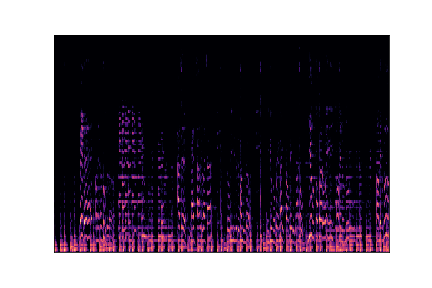

In [4]:
#this is what the given spectrograms look like
image

In [5]:
#understanding the spectrogram:

In [6]:
#this is important and the core information about the audio that we use to create our spectrograms and mfccs
signal, sample_rate = librosa.load('/content/drive/MyDrive/Data/genres_original/blues/blues.00001.wav')

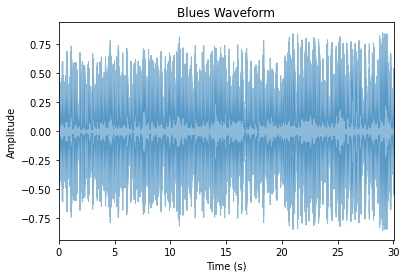

In [21]:
#first we plot the songs waveform
#this is one way to do it using librosa.waveshow
#you can also use librosa.waveplot
plt.figure()
librosa.display.waveplot(signal, sr = sample_rate, alpha = 0.5)
plt.title('Blues Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
#lower alpha gives higher transparency 

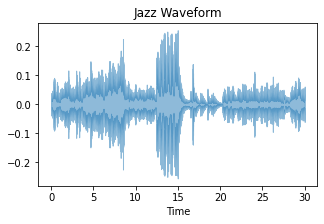

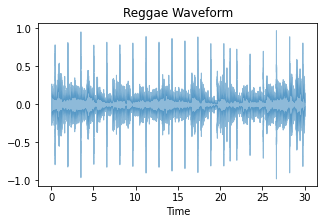

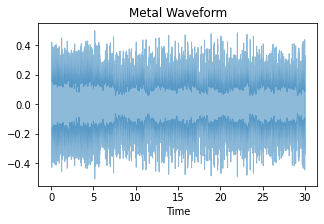

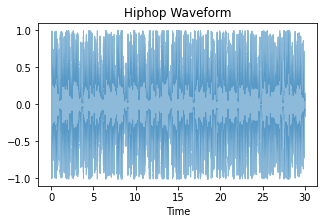

In [29]:
#examples of other genre waveforms
signal_1, sample_rate_1 = librosa.load('/content/drive/MyDrive/Data/genres_original/jazz/jazz.00001.wav')
signal_2, sample_rate_2 = librosa.load('/content/drive/MyDrive/Data/genres_original/reggae/reggae.00001.wav')
signal_3, sample_rate_3 = librosa.load('/content/drive/MyDrive/Data/genres_original/metal/metal.00001.wav')
signal_4, sample_rate_4 = librosa.load('/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00001.wav')

plt.figure(figsize = (5,3))
librosa.display.waveshow(signal_1, sr = sample_rate_1, alpha = 0.5)
plt.title('Jazz Waveform')
plt.show()

plt.figure(figsize = (5,3))
librosa.display.waveshow(signal_2, sr = sample_rate_2, alpha = 0.5)
plt.title('Reggae Waveform')
plt.show()

plt.figure(figsize = (5,3))
librosa.display.waveshow(signal_3, sr = sample_rate_3, alpha = 0.5)
plt.title('Metal Waveform')
plt.show()

plt.figure(figsize = (5,3))
librosa.display.waveshow(signal_4, sr = sample_rate_4, alpha = 0.5)
plt.title('Hiphop Waveform')
plt.show()

In [30]:
#we now use a fourier transform on this waveform in order to extract different audio features from it
#fast fourier transform
ft = np.fft.fft(signal)
spectrum = np.abs(ft)
freq = np.linspace(0, sample_rate, len(spectrum))

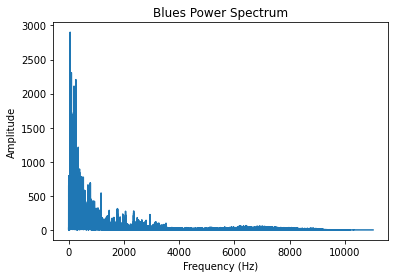

In [31]:
#plot power spectrum
#this just shows us which frequencies have the highest / lowest amplitudes
#converts into a frequency domain instead of a time domain
plt.figure(figsize=(6,4))
plt.plot(freq[:int(len(spectrum)/2)], spectrum[:int(len(spectrum)/2)])
plt.title('Blues Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()
#apparently we should only plot up to about 10kHz due to this:
#https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem

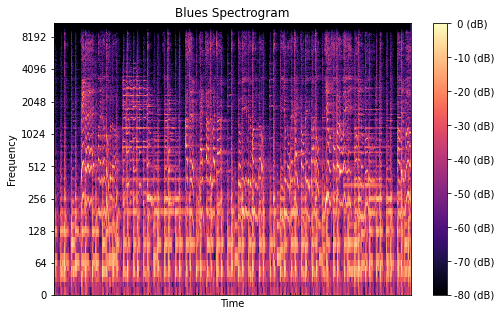

In [34]:
#one approach:
hop_len = 512 
#hop length is a term in audio processing used the set the length between windows that are fourier transformed basically
#not that important to understand
#short time fourier transform
stft = librosa.stft(signal, hop_length = hop_len)
spectrogram = np.abs(stft)
#this gives the the colour scale / amplitude in decibels (like the log of the amplitude):
db_spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)
#the ref makes sure the amplitude is scaled relative to to the maximum amplitude

#plot spectrogram
plt.figure(figsize=(8,5))
librosa.display.specshow(db_spectrogram, sr = sample_rate, y_axis='log')
#make sure the yaxis is log scaled too
plt.colorbar(format = '%2.0f (dB)')
plt.title('Blues Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


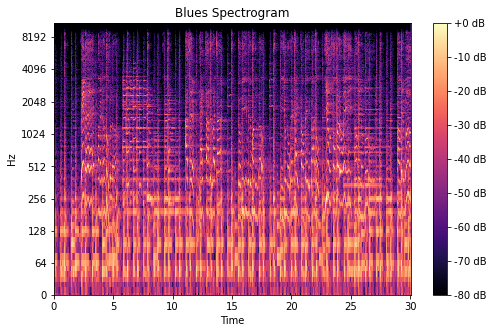

In [42]:
#here we have some alternative more compact code for making spectrograms using the librosa library:

stft = librosa.stft(signal, hop_length=hop_len)
spect_db = librosa.amplitude_to_db(np.abs(stft), ref = np.max)
#ref max makes sure the amplitude is scaled relative to to the maximum amplitude

plt.figure(figsize=(8,5));
librosa.display.specshow(spect_db, sr=sample_rate, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Blues Spectrogram')
plt.savefig('drive/MyDrive/Data/Blues_Spectrogram')

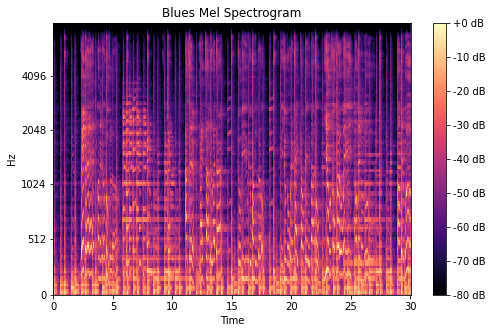

In [44]:
#Now the mel-spectrograms
#we will use blues.00001 again
#this is the mel scale as the freq only goes up to aroud 4000 Hz

#the mel spectorgram is just the spectrogram where the frequency is converted to a mel scale.
#this makes the frequencies more similar to how a human ear would hear them

spect = librosa.feature.melspectrogram(y=signal, sr=sample_rate, hop_length=hop_len)
spect = librosa.power_to_db(spect, ref=np.max) #converting to decibels

plt.figure(figsize=(8,5))
librosa.display.specshow(spect, y_axis='mel', fmax =8000, x_axis='time')
plt.title('Blues Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.savefig('drive/MyDrive/Data/Blues_Mel_Spectrgram')

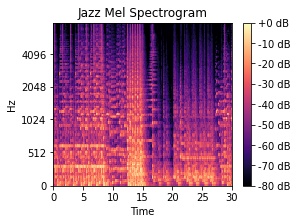

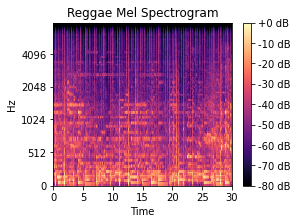

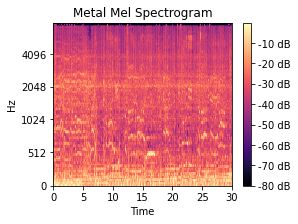

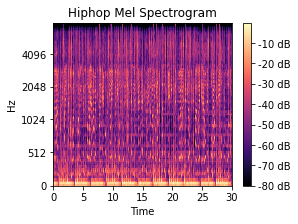

In [46]:
#other genres mel spectrograms:

spect_1 = librosa.feature.melspectrogram(y=signal_1, sr=sample_rate_1, hop_length=hop_len)
spect_1 = librosa.power_to_db(spect_1, ref=np.max)

plt.figure(figsize=(4,3))
librosa.display.specshow(spect_1, y_axis='mel', fmax =8000, x_axis='time')
plt.title('Jazz Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.savefig('drive/MyDrive/Data/Jazz_Mel_Spectrogram')

spect_2 = librosa.feature.melspectrogram(y=signal_2, sr=sample_rate_2, hop_length=hop_len)
spect_2 = librosa.power_to_db(spect_2, ref=np.max)

plt.figure(figsize=(4,3))
librosa.display.specshow(spect_2, y_axis='mel', fmax =8000, x_axis='time')
plt.title('Reggae Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.savefig('drive/MyDrive/Data/Reggae_Mel_Spectrogram')

spect_3 = librosa.feature.melspectrogram(y=signal_3, sr=sample_rate_3, hop_length=hop_len)
spect_3 = librosa.power_to_db(spect_3, ref=np.max)

plt.figure(figsize=(4,3))
librosa.display.specshow(spect_3, y_axis='mel', fmax =8000, x_axis='time')
plt.title('Metal Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.savefig('drive/MyDrive/Data/Metal_Mel_Spectrogram')

spect_4 = librosa.feature.melspectrogram(y=signal_4, sr=sample_rate_4, hop_length=hop_len)
spect_4 = librosa.power_to_db(spect_4, ref=np.max)

plt.figure(figsize=(4,3))
librosa.display.specshow(spect_4, y_axis='mel', fmax =8000, x_axis='time')
plt.title('Hiphop Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.savefig('drive/MyDrive/Data/Hiphop_Mel_Spectrogram')

In [18]:
#saving the mel spectrogram data:

In [52]:
#note that some mel spectrograms are different sizes and go up to difference frequencies so we will need them to all be the same shape
#this cell takes a little while so dont run

sizes = []
for folder in os.scandir('drive/MyDrive/Data/genres_original'):
    for file in os.scandir('drive/MyDrive/Data/genres_original/'+str(folder)[11:-2]):   
      signal, sample_rate = librosa.load(file)    
      spect = librosa.feature.melspectrogram(y=signal, sr=sample_rate, hop_length=hop_len)
      spect = librosa.power_to_db(spect, ref=np.max)    
      sizes.append(spect.shape)


In [53]:
mel_size_check = sizes.count(sizes[0]) == len(sizes)
print(mel_size_check)
#this is false meaning not every mel spectrogram is the same size
#this means we'll have to bulk out some of the smaller ones:
print(max(sizes))

False
(128, 1320)


In [58]:
#this converts all of the wav files into spectrograms like the above functions,
#and saves them asa arrays with corresponding labels

def mel_spect_data():
  labels = []
  mel_spects = []
  for folder in os.scandir('drive/MyDrive/Data/genres_original'):
    for file in os.scandir('drive/MyDrive/Data/genres_original/'+str(folder)[11:-2]):
      signal, sample_rate = librosa.load(file)

      label = str(file)[11:-12]
      labels.append(label)

      spect = librosa.feature.melspectrogram(y=signal, sr=sample_rate, hop_length=hop_len)
      spect = librosa.power_to_db(spect, ref=np.max)

      if spect.shape[1] != 1320:
            spect.resize(128,1320, refcheck=False)
      
      mel_spects.append(spect)

  labels = pd.Series(labels)
  label_dict = {'blues': 0,'classical': 1,'country': 2,'disco': 3,'hiphop': 4,'jazz': 5,'metal': 6,'pop': 7,'reggae': 8,'rock': 9}
  mel_spect_label = labels.map(label_dict).values

  mel_spect_data = np.array(mel_spects)
  return mel_spect_data, mel_spect_label


In [59]:
data_mel, label_mel = mel_spect_data()
#this is to create the data arrays - dont run takes ages 

In [61]:
data_mel.shape

(999, 128, 1320)

In [62]:
label_mel.shape

(999,)

In [63]:
#np.save('drive/MyDrive/Data/mel_spects.npy', data_mel)
#np.save('drive/MyDrive/Data/mel_labels.npy', label_mel)

In [ ]:
#X = np.load('drive/MyDrive/Data/mel_spects.npy')
#Y = np.load('drive/MyDrive/Data/mel_labels.npy')

In [28]:
#this data is now ready to use in a model...

In [79]:
#now were going to make mfccs, as they contain useful information for genre classification
#mfcc stands for mel frequency cepstral coeficient 
#we use 13 MFCCs

mfccs = librosa.feature.mfcc(y = signal, sr = sample_rate, hop_length = hop_len, n_mfcc = 13)

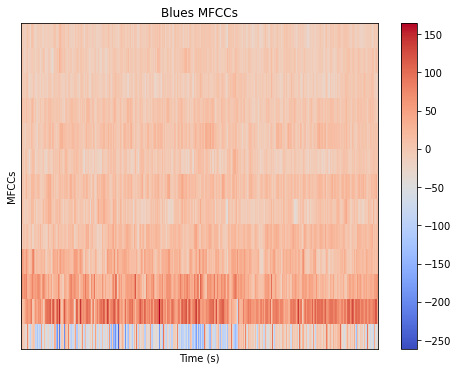

<Figure size 432x288 with 0 Axes>

In [80]:
plt.figure(figsize = (8,6))
librosa.display.specshow(mfccs, sr = sample_rate, hop_length = hop_len)
plt.colorbar()
plt.title('Blues MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCCs')
plt.show()
plt.savefig('drive/MyDrive/Data/Blues_MFCC')
#13 stripes are the 13 MFCCs 

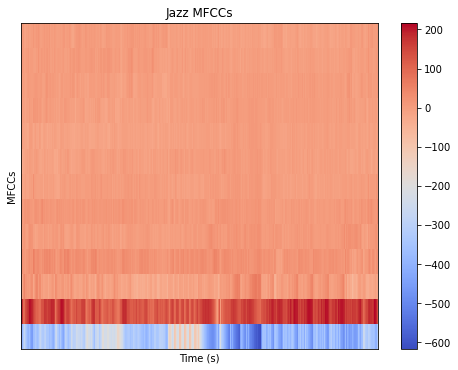

<Figure size 432x288 with 0 Axes>

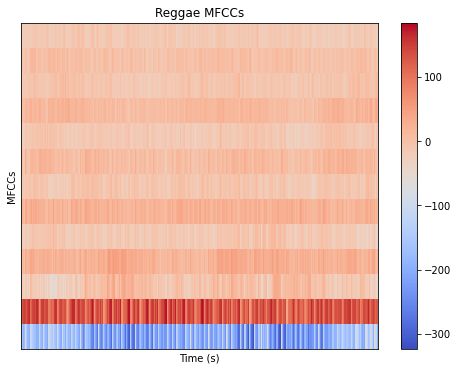

<Figure size 432x288 with 0 Axes>

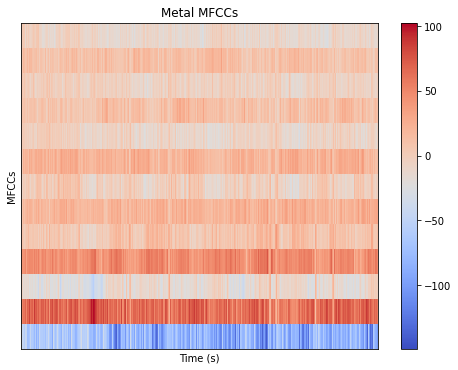

<Figure size 432x288 with 0 Axes>

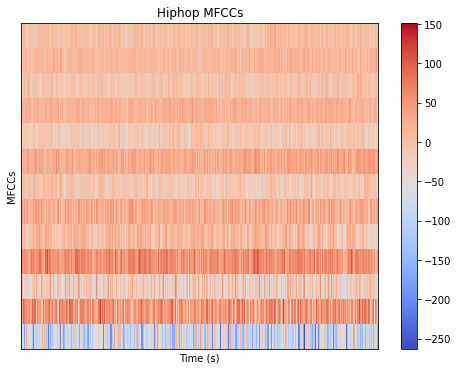

<Figure size 432x288 with 0 Axes>

In [51]:
mfccs_1 = librosa.feature.mfcc(y = signal_1, sr = sample_rate_1, hop_length = hop_len, n_mfcc = 13)
mfccs_2 = librosa.feature.mfcc(y = signal_2, sr = sample_rate_2, hop_length = hop_len, n_mfcc = 13)
mfccs_3 = librosa.feature.mfcc(y = signal_3, sr = sample_rate_3, hop_length = hop_len, n_mfcc = 13)
mfccs_4 = librosa.feature.mfcc(y = signal_4, sr = sample_rate_4, hop_length = hop_len, n_mfcc = 13)

plt.figure(figsize = (8,6))
librosa.display.specshow(mfccs_1, sr = sample_rate_1, hop_length = hop_len)
plt.colorbar()
plt.title('Jazz MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCCs')
plt.show()
plt.savefig('drive/MyDrive/Data/Jazz_MFCC')

plt.figure(figsize = (8,6))
librosa.display.specshow(mfccs_2, sr = sample_rate_2, hop_length = hop_len)
plt.colorbar()
plt.title('Reggae MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCCs')
plt.show()
plt.savefig('drive/MyDrive/Data/Reggae_MFCC')

plt.figure(figsize = (8,6))
librosa.display.specshow(mfccs_3, sr = sample_rate_3, hop_length = hop_len)
plt.colorbar()
plt.title('Metal MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCCs')
plt.show()
plt.savefig('drive/MyDrive/Data/Metal_MFCC')

plt.figure(figsize = (8,6))
librosa.display.specshow(mfccs_4, sr = sample_rate_4, hop_length = hop_len)
plt.colorbar()
plt.title('Hiphop MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCCs')
plt.show()
plt.savefig('drive/MyDrive/Data/Hiphop_MFCC')

In [ ]:
#we have to scale them??
# mfcc = mfcc.T
#or this?
# mfccscaled = np.mean(mfcc.T, axis=0)

In [66]:
#like spectrograms, some of the mfccs may be different sizes
#again, cell takes a while so dont run

sizes_mfcc = []
for folder in os.scandir('drive/MyDrive/Data/genres_original'):
    for file in os.scandir('drive/MyDrive/Data/genres_original/'+str(folder)[11:-2]):   
      signal, sample_rate = librosa.load(file)    
      mfcc = librosa.feature.mfcc(y = signal, sr = sample_rate, hop_length = hop_len, n_mfcc = 13)    
      sizes_mfcc.append(mfcc.shape)


In [67]:
mfcc_size_check = sizes.count(sizes_mfcc[0]) == len(sizes_mfcc)
print(mfcc_size_check)
#this is false meaning not every mfcc is the same size
#this means we'll have to bulk out some of the smaller ones:
print(max(sizes_mfcc))

False
(13, 1320)


In [88]:
def mfcc_data():
  labels = []
  mfccs = []
  for folder in os.scandir('drive/MyDrive/Data/genres_original'):
    for file in os.scandir('drive/MyDrive/Data/genres_original/'+str(folder)[11:-2]):
      signal, sample_rate = librosa.load(file)

      label = str(file)[11:-12]
      labels.append(label)

      mfcc = librosa.feature.mfcc(y = signal, sr = sample_rate, hop_length = hop_len, n_mfcc = 13)
      mfcc_scaled = np.mean(mfcc.T,axis=0)

      if mfcc_scaled.shape[0] != 1320:
        mfcc_scaled = np.resize(mfcc_scaled, (1320,13))

      mfccs.append(mfcc_scaled)
  
  
  labels = pd.Series(labels)
  label_dict = {'blues': 0,'classical': 1,'country': 2,'disco': 3,'hiphop': 4,'jazz': 5,'metal': 6,'pop': 7,'reggae': 8,'rock': 9}
  mfcc_label = labels.map(label_dict).values

  mfcc_stack = np.dstack(mfccs)
  mfcc_data = np.rollaxis(mfcc_stack,-1)
  
  return mfcc_data, mfcc_label


In [89]:
data_mfcc, label_mfcc = mfcc_data()

In [90]:
data_mfcc.shape

(999, 1320, 13)

In [91]:
label_mfcc.shape

(999,)

In [92]:
#np.save('drive/MyDrive/Data/mfccs.npy', data_mfcc)
#np.save('drive/MyDrive/Data/mfcc_labels.npy', label_mfcc)

In [76]:
#note that label_mfcc and label_mel will be the same arrays 

In [ ]:
#this data is now ready to use in a model...